## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Dibimbing/Materi Day 18/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data reading

In [ ]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

As shown above, the data set contains 19 independent variables, which can be classified into 3 groups:

(1) Demographic Information

`gender`: Whether the client is a female or a male (Female, Male).

`SeniorCitizen`: Whether the client is a senior citizen or not ( 0, 1).

`Partner`: Whether the client has a partner or not (Yes, No).

`Dependents`: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information

`tenure`: Number of months the customer has stayed with the company (Multiple different numeric values).

`Contract`: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

`PaperlessBilling`: Whether the client has paperless billing or not (Yes, No).

`PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

`MontlyCharges`: The amount charged to the customer monthly (Multiple different numeric values).

`TotalCharges`: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information

`PhoneService`: Whether the client has a phone service or not (Yes, No).

`MultipleLines`: Whether the client has multiple lines or not (No phone service, No, Yes).

`InternetServices`: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)

`OnlineSecurity`: Whether the client has online security or not (No internet service, No, Yes).

`OnlineBackup`: Whether the client has online backup or not (No internet service, No, Yes).

`DeviceProtection`: Whether the client has device protection or not (No internet service, No, Yes).

`TechSupport`: Whether the client has tech support or not (No internet service, No, Yes).

`StreamingTV`: Whether the client has streaming TV or not (No internet service, No, Yes).

`StreamingMovies`: Whether the client has streaming movies or not (No internet service, No, Yes).

## Data Preprocessing

### Missing value handling



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparently, there are no null values on the data set; however, i observed that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type.

In [ ]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can now observe that the column `TotalCharges` has 11 missing values.

In [ ]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


I decide to remove those observations from the data set.


In [ ]:
# drop rows with TotalCharges column contains NaN
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Done for NaN value handling.

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

### Data visualization

The `customerID` column is useless to explain whether not the customer will churn. Therefore, i'll drop this column from the data set.

In [ ]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

As shown in data reading, some payment method denominations contain in parenthesis the word "(automatic)" and "check". These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].str.strip().str.replace(' \(automatic\)|check', '', regex=True)

In [ ]:
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
numericals = ['tenure', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

#### Proportion of categorical features

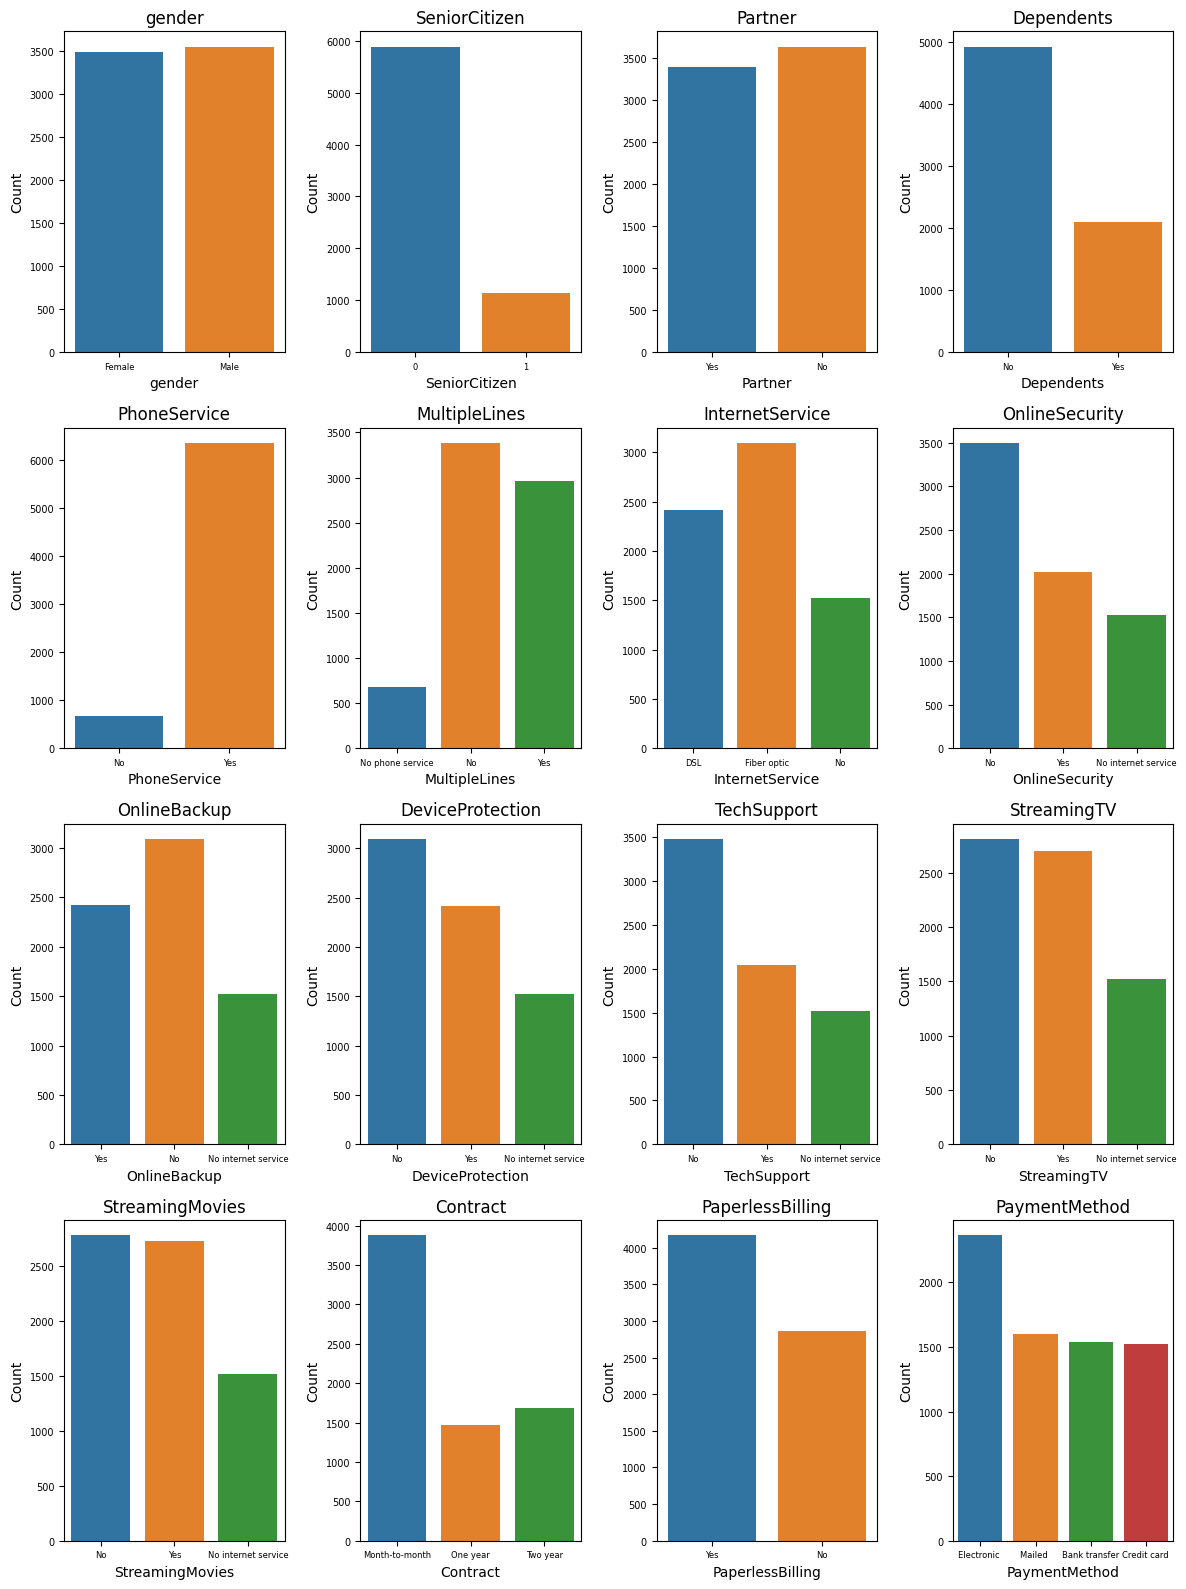

In [ ]:
num_cols = len(categoricals)
num_rows = (num_cols - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(12, 4*num_rows))

for i, column in enumerate(categoricals):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.countplot(data=df, x=column, ax=ax)

    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)

    ax.set_title(column, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# I want to see a crosstab of categorical features
import pandas as pd

# Combine categorical columns and the target variable into a single DataFrame
df_categoricals = df.loc[:, categoricals + [target]]

# Display crosstab
for col in categoricals:
    crosstab = pd.crosstab(df_categoricals[col], df_categoricals[target])
    print(f"Crosstab for {col}:\n{crosstab}\n")

Crosstab for gender:
Churn     No  Yes
gender           
Female  2544  939
Male    2619  930

Crosstab for SeniorCitizen:
Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476

Crosstab for Partner:
Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669

Crosstab for Dependents:
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1773   326

Crosstab for PhoneService:
Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699

Crosstab for MultipleLines:
Churn               No  Yes
MultipleLines              
No                2536  849
No phone service   510  170
Yes               2117  850

Crosstab for InternetService:
Churn              No   Yes
InternetService            
DSL              1957   459
Fiber optic      1799  1297
No               1407   113

Crosstab for OnlineSecurity:
Churn                  No   Yes
OnlineSecurity         

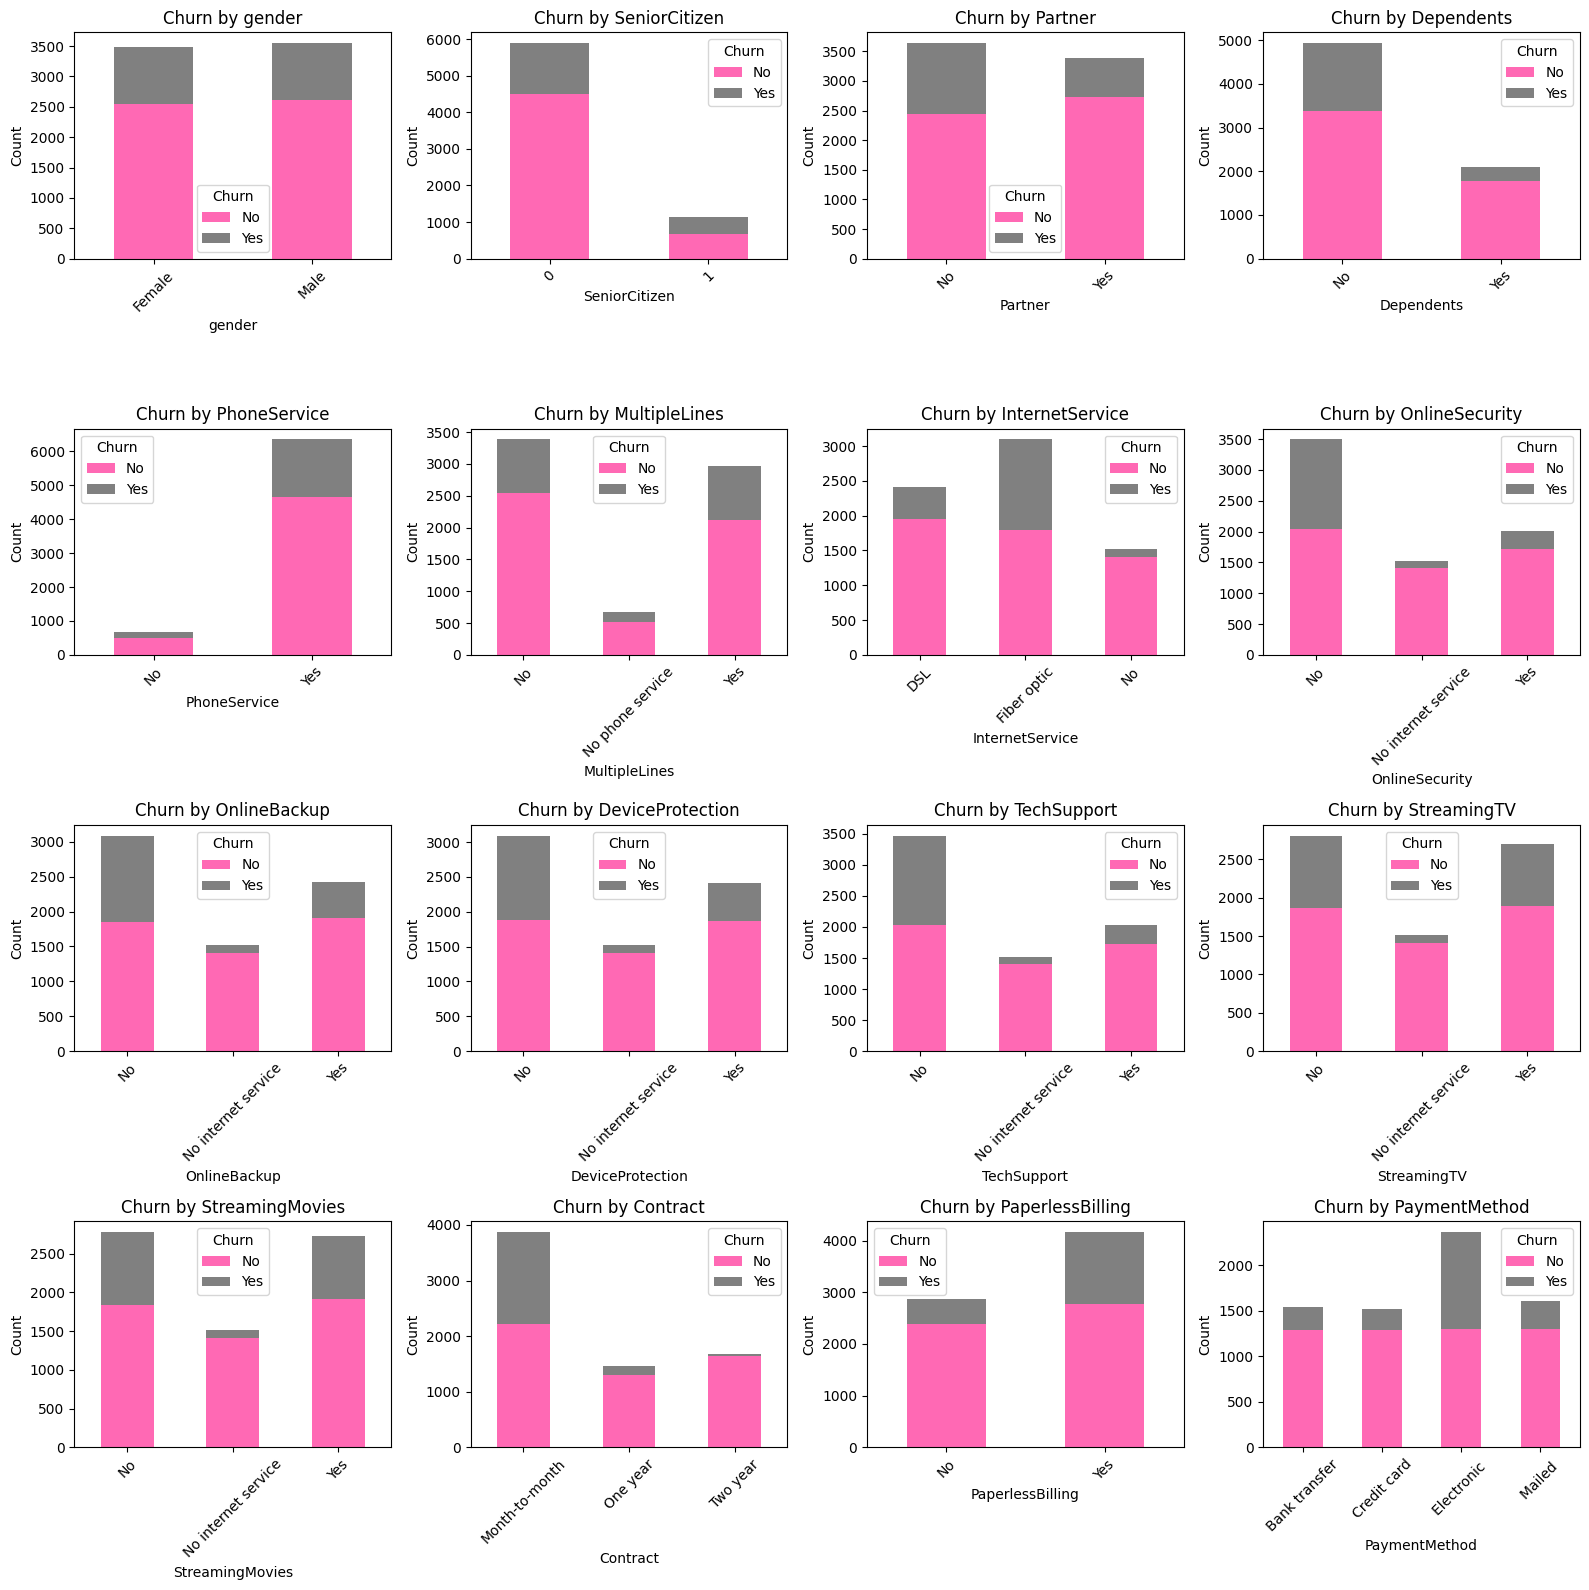

In [ ]:
num_cols = len(categoricals)
num_rows = (num_cols - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4*num_rows))

for i in range(num_cols):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    col_name = categoricals[i]
    crosstab = pd.crosstab(df_categoricals[col_name], df_categoricals['Churn'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['hotpink', 'gray'])
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn by {col_name}')
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#### Feature Important

In [ ]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable
categoricals_variabel = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categoricals_variabel.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


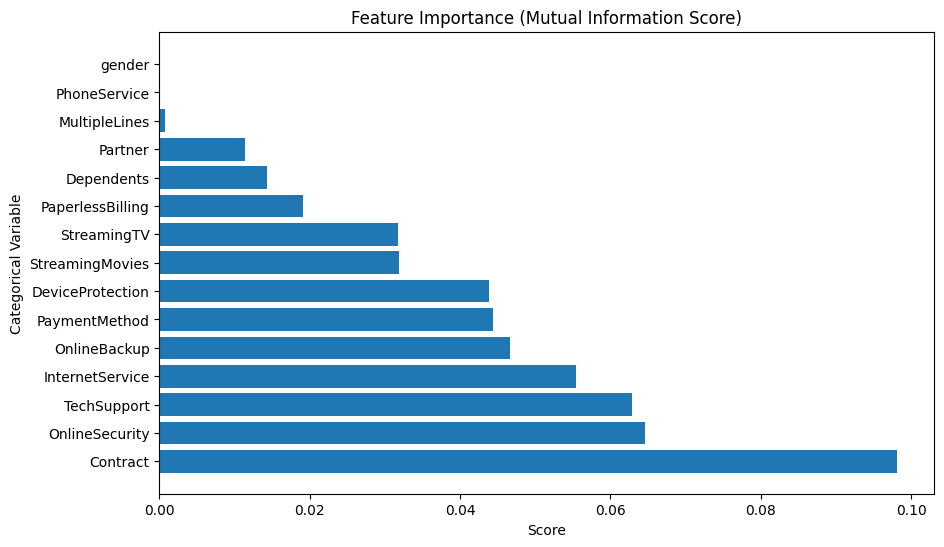

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Score')
plt.ylabel('Categorical Variable')
plt.title('Feature Importance (Mutual Information Score)')
plt.show()


As shown above, `gender`, `PhoneService`, and `MultipleLines` have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

#### Distribution of numerical features

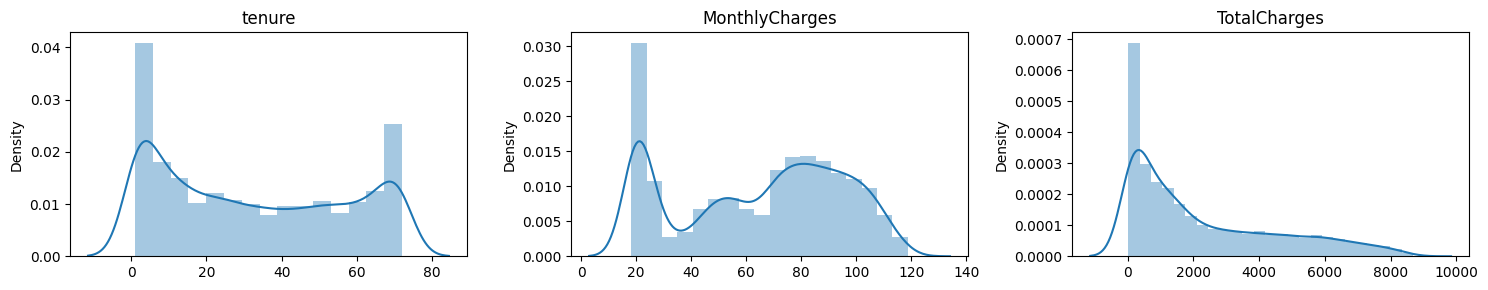

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

#plotting
ax = sns.distplot(df['tenure'].values, ax=axes[0])
ax.set_title('tenure')

ax = sns.distplot(df['MonthlyCharges'].values, ax=axes[1])
ax.set_title('MonthlyCharges')

ax = sns.distplot(df['TotalCharges'].values, ax=axes[2])
ax.set_title('TotalCharges')

plt.tight_layout()
plt.show()

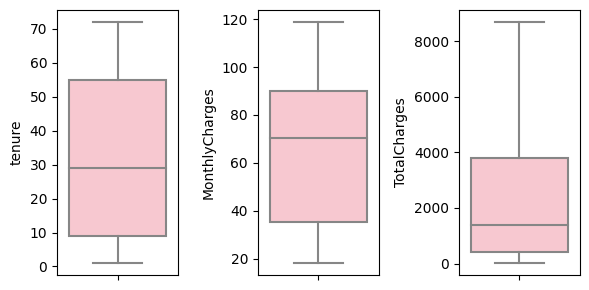

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(6,3))

#plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='pink')
    plt.tight_layout()

No outliers found

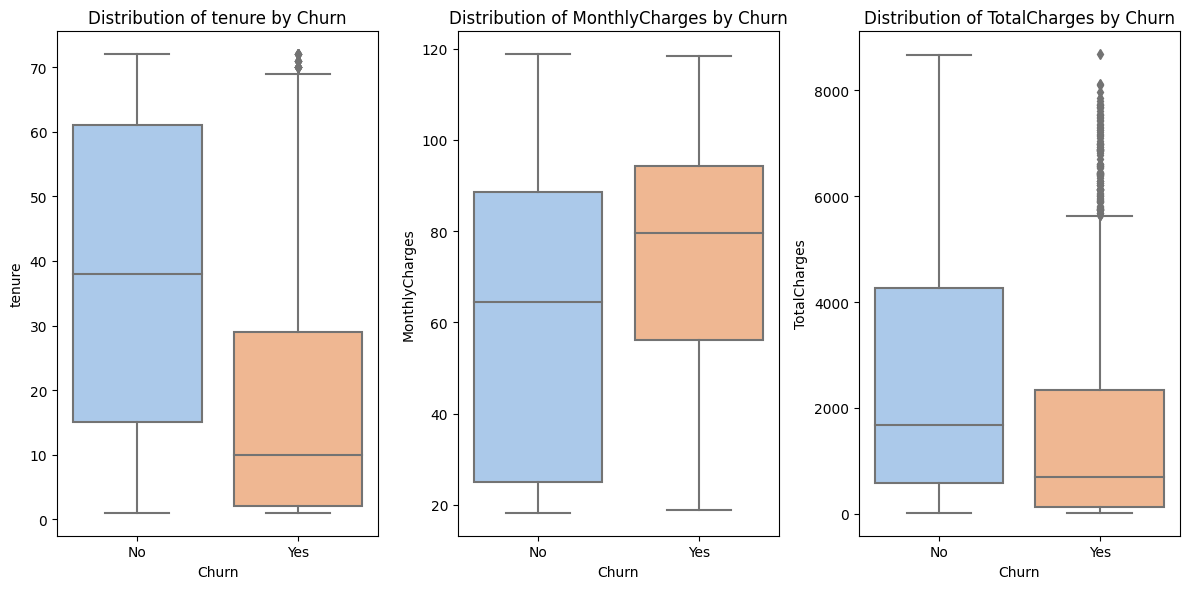

In [ ]:
plt.figure(figsize=(12, 6))
features = numericals

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x=df['Churn'], y=df[feature], palette='pastel')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Churn')
    plt.tight_layout()

plt.show()

#### Proportion of the target

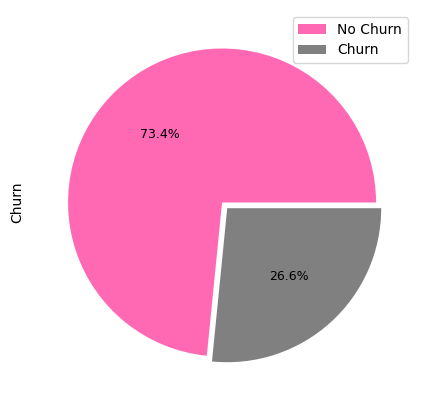

In [ ]:
plt.figure(figsize=(7,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['hotpink','gray'], explode = [0,0.05], textprops = {"fontsize":9})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

As shown above, this is an imbalanced data set because both classes are not equally distributed among all observations, being `no` the majority class (73.42%).

#### Heatmap correlation


In [ ]:
# i'll make a copy of dataframe before encode the categorical feature to make a heatmap correlation
# because i want to see not only numeric feature but all the features included
df_copy = df.copy()

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [ ]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


<Axes: >

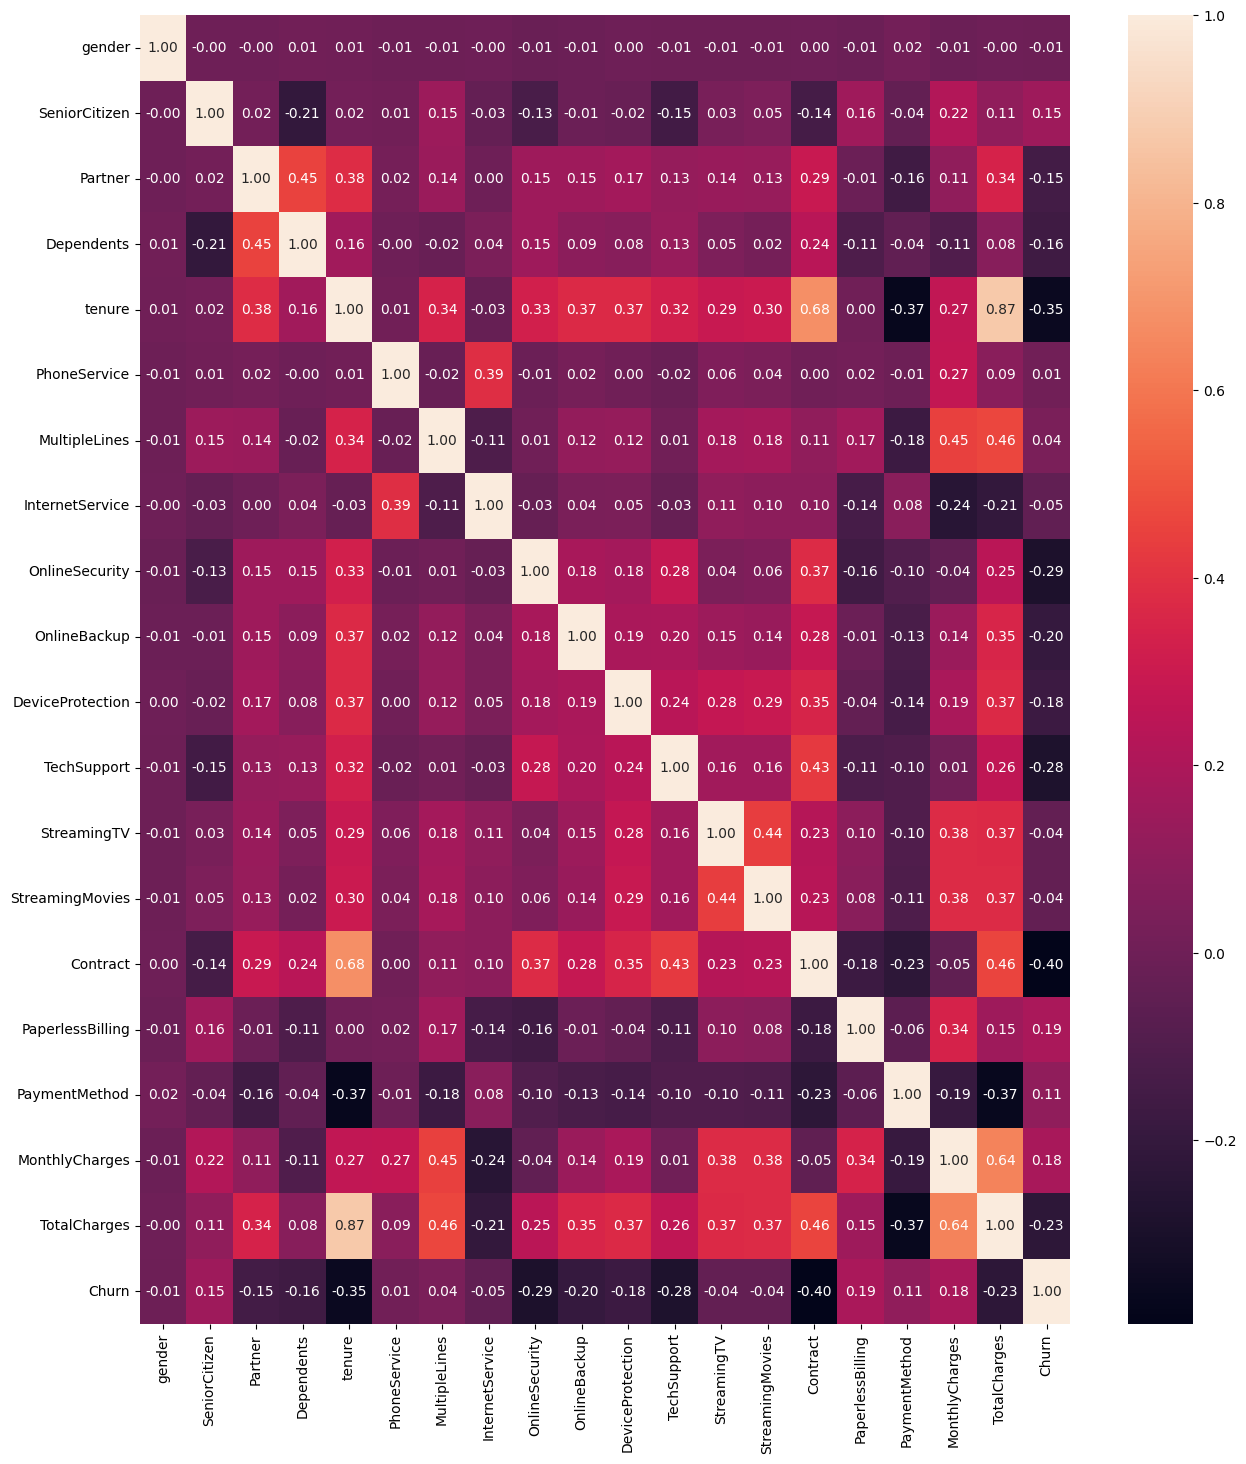

In [ ]:
# Lets check correlation heatmap
plt.figure(figsize=(15,17))
correlation = df_copy.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

### Change categorical features to numeric

#### No modification

The `SeniorCitizen` column is already a binary column and should not be modified.

#### Label encoding

In this project, i will use label encoding with the following binary variables: (1)`gender`, (2)`Partner`, (3)`Dependents`, (4)`PaperlessBilling`, (5)`PhoneService`, and (6)`Churn`.

In [ ]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})

#### One-Hot Encoding

In this project, i will apply one-hot encoding to the following categorical variables: (1)`Contract`, (2)`PaymentMethod`, (3)`MultipleLines`, (4)`InternetServices`, (5)`OnlineSecurity`, (6)`OnlineBackup`, (7)`DeviceProtection`, (8)`TechSupport`, (9)`StreamingTV`, and (10)`StreamingMovies`

In [ ]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)


In [ ]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic,PaymentMethod_Mailed
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


#### Normalization

In this project, i will use the min-max method to rescale the numeric columns (`tenure`, `MontlyCharges`, and `TotalCharges`) to a common scale because as we can see there are some outliers exist in the numeric features

In [ ]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [ ]:
# Accessing the normalized values
normalized_tenure = df_transformed['tenure']
normalized_monthly_charges = df_transformed['MonthlyCharges']
normalized_total_charges = df_transformed['TotalCharges']

# Combine the normalized columns into a single DataFrame
normalized_numeric_col = pd.concat([normalized_tenure, normalized_monthly_charges, normalized_total_charges], axis=1)

normalized_numeric_col.head(3)

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310


### Imbalance data handling

In [ ]:
df_transformed.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic,PaymentMethod_Mailed
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7032 non-null   int64  
 1   SeniorCitizen                         7032 non-null   int64  
 2   Partner                               7032 non-null   int64  
 3   Dependents                            7032 non-null   int64  
 4   tenure                                7032 non-null   float64
 5   PhoneService                          7032 non-null   int64  
 6   PaperlessBilling                      7032 non-null   int64  
 7   MonthlyCharges                        7032 non-null   float64
 8   TotalCharges                          7032 non-null   float64
 9   Churn                                 7032 non-null   int64  
 10  MultipleLines_No                      7032 non-null   uint8  
 11  MultipleLines_No 

In [ ]:
target = df_transformed['Churn'].value_counts().reset_index()
target.rename(columns={'index':'Churn','Churn':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Churn,freq,percentage
0,0,5163,73.42
1,1,1869,26.58


In [ ]:
df_numeric = df_transformed[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
df_numeric = df_numeric.dropna()
df_numeric.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,0.000000,0.115423,0.001275,0
1,0.464789,0.385075,0.215867,0
2,0.014085,0.354229,0.010310,1
3,0.619718,0.239303,0.210241,0
4,0.014085,0.521891,0.015330,1


In [ ]:
df_numeric['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df_numeric['Churn'].value_counts(normalize=True)*100

0    73.421502
1    26.578498
Name: Churn, dtype: float64

In [ ]:
X = df_numeric.drop(['Churn'], axis=1)
y = df_numeric['Churn']

# Oversampling with SMOTE
smote = SMOTE()
X_over_smote, y_over_smote = smote.fit_resample(X, y)

# Check value counts of the target variable after oversampling
print(y_over_smote.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

### Numeric feature as a baseline

#### Split dataset

In [ ]:
X = df_numeric.drop(['Churn'],axis=1)
y = df_numeric['Churn']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 75% train
# 25% test

#### Modeling

In this project, i will compare 3 different algorithms, all of them already implemented in Scikit-Learn.

1.   Decision Tree
2.   Random Forest
3.   KNN
4.   Gradient Boosting

In [ ]:
# Model 1 = DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_dt = model.predict(X_test)

In [ ]:
# Model 2 = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [ ]:
# Model 3 = KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [ ]:
# Model 4 = GradientBoostingClassifier()

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

#### Evaluation

I will use recall for metric evaluation which in this case would be correctly identifying members who are going to churn. Recall prioritizes the ability to correctly detect members who are going to churn, thus minimizing the number of false negatives (failing to identify members who are going to churn). In my oppinion, not identifying members who are going to churn (false negatives) can result in significant revenue loss in this business. On the other hand, false positives (incorrectly identifying members) have a lower impact, especially if we assume that the customer interaction is not hostile.

In [ ]:
# Recall for Decision Tree model
recall_score_dt = recall_score(y_test, y_pred_dt)
print("Sensitivity (Decision Tree):", recall_score_dt)

# recall for Random Forest model
recall_score_rf = recall_score(y_test, y_pred_rf)
print("Sensitivity (Random Forest):", recall_score_rf)

# recall for KNN model
recall_score_knn = recall_score(y_test, y_pred_knn)
print("Sensitivity (KNearest Neighbor):", recall_score_knn)

# Recall for Gradient Boosting model
recall_score_gb = recall_score(y_test, y_pred_gb)
print("Sensitivity (Gradient Boosting):", recall_score_gb)

Sensitivity (Decision Tree): 0.4304812834224599
Sensitivity (Random Forest): 0.446524064171123
Sensitivity (KNearest Neighbor): 0.4572192513368984
Sensitivity (Gradient Boosting): 0.46524064171123


pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

**As shown above, we can see that the best model is to use Gradient Boosting model because it shows the highest recall score of 46,5%. A sensitivity of 46.5% means that the model correctly identifies 46.5% of the positive cases (true positives) out of all the actual positive cases in the dataset. In other words, the model captures less than half of the true positive cases, indicating that it has a relatively low ability to detect the positive class accurately. This could imply that the model may have a higher rate of false negatives, where it fails to identify instances that actually belong to the positive class. Therefore, improving the sensitivity of the model would be desirable in order to better capture the positive cases.**

I will try another model with different feature selection

### Modeling for all variables

In [ ]:
X = df_transformed.drop(columns='Churn')

# select dependent variables
y = df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

#### Spit dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

#### Modeling

In [ ]:
# Model 1 = DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_dt = model.predict(X_test)

In [ ]:
# Model 2 = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Model 3 = KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [ ]:
# Model 4 = GradientBoostingClassifier()

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

#### Evaluation

In [ ]:
# Recall for Decision Tree model
recall_score_dt = recall_score(y_test, y_pred_dt)
print("Sensitivity (Decision Tree):", recall_score_dt)

# recall for Random Forest model
recall_score_rf = recall_score(y_test, y_pred_rf)
print("Sensitivity (Random Forest):", recall_score_rf)

# recall for KNN model
recall_score_knn = recall_score(y_test, y_pred_knn)
print("Sensitivity (KNearest Neighbor):", recall_score_knn)

# Recall for Gradient Boosting model
recall_score_gb = recall_score(y_test, y_pred_gb)
print("Sensitivity (Gradient Boosting):", recall_score_gb)

Sensitivity (Decision Tree): 0.48214285714285715
Sensitivity (Random Forest): 0.5089285714285714
Sensitivity (KNearest Neighbor): 0.5535714285714286
Sensitivity (Gradient Boosting): 0.5580357142857143


The best model is still Gradient Boosting but with better sensitivity value which is almost 56%.

### Modeling with feature important

As we know before, feature `gender`, `PhoneService`, and `MultipleLines` have a mutual information score really close to 0 to the target so i will remove those features from dataset in this modeling.

In [ ]:
X = df_transformed.drop(columns=['Churn', 'gender', 'PhoneService', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes'])

# select dependent variables
y = df_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic ',
       'PaymentMethod_Mailed '],
      dtype='object')
Churn


#### Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

#### Modeling

In [ ]:
# Model 1 = DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred_dt = model.predict(X_test)

In [ ]:
# Model 2 = RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Model 3 = KNeighborsClassifier()

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [ ]:
# Model 4 = GradientBoostingClassifier()

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

#### Evaluation

In [ ]:
# Recall for Decision Tree model
recall_score_dt = recall_score(y_test, y_pred_dt)
print("Sensitivity (Decision Tree):", recall_score_dt)

# recall for Random Forest model
recall_score_rf = recall_score(y_test, y_pred_rf)
print("Sensitivity (Random Forest):", recall_score_rf)

# recall for KNN model
recall_score_knn = recall_score(y_test, y_pred_knn)
print("Sensitivity (KNearest Neighbor):", recall_score_knn)

# Recall for Gradient Boosting model
recall_score_gb = recall_score(y_test, y_pred_gb)
print("Sensitivity (Gradient Boosting):", recall_score_gb)

Sensitivity (Decision Tree): 0.49776785714285715
Sensitivity (Random Forest): 0.49776785714285715
Sensitivity (KNearest Neighbor): 0.5066964285714286
Sensitivity (Gradient Boosting): 0.5379464285714286


Uh-oh. The highest sensitivity is in the same model (Gradient Boosting) with the value 53%. It is higher than when we use numeriv feature only, but lower than when we use all features included to the model.

## NOTE:

**Judulnya HW simpe tapi mikirinnya kayak mikirin jodoh ya Kak Arif, tidak sesimple itu. Model-model dengan feature yang berbeda saya coba masukkan, tujuan saya untuk lihat hasil model dan metric evaluation yang paling oke. Saya share as commenter, jadi kalau ada koreksi (boleh/tidak dan atau perbaikan lainnya) mungkin Kak Arif berkenan untuk dituliskan komentar reviewnya Mas untuk perbaikan saya kedepannya...**



**Terimakasih banyak!**